In [813]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [814]:
data=pd.read_csv("data.csv",sep=";")

In [815]:
set(data.Target)

{'Dropout', 'Enrolled', 'Graduate'}

In [816]:
data=data[data["Target"]!="Enrolled"]

In [817]:
set(data.Target)

{'Dropout', 'Graduate'}

In [931]:
data.Target.replace(["Dropout","Graduate"],[0,1],inplace=True);

In [819]:
set(data.Target)

{0, 1}

In [820]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [821]:
def model(X,theta):
    return sigmoid(X.dot(theta))

In [822]:
def cost_function_0(X,y,theta):
    m = y.shape[0]
    A = model(X,theta)
    return -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [823]:
def cost_function(X,y,theta):
    epsilon = 0 #1e-15
    m = y.shape[0]
    A = model(X,theta)
    # Empêche A d'être exactement 0 ou 1
    A = np.clip(A, epsilon, 1 - epsilon)
    return -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [824]:
def clip(x,mi,ma):
    if x<mi:
        return mi
    elif x>ma:
        return ma
    else:
        return x

In [825]:
def grad(x,y,theta):
    m=len(y)
    return 1/m * x.T.dot(model(x,theta) - y)

In [826]:
def gradient_descent(x,y,learning_rate,n_iterations):
    theta = np.random.randn(X_train.shape[1],1)
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(x,y,theta)
        cost_history[i] = cost_function(x,y,theta)
    return theta , cost_history

In [827]:
x=data.drop(["Target"],axis=1).values

In [828]:
y=data.Target.values

In [829]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [830]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [831]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2904, 36), (726, 36), (2904, 1), (726, 1))

In [832]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [833]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                        

In [834]:
set(data.Target)

{0, 1}

In [835]:
scaler = StandardScaler()

In [836]:
x_train = scaler.fit_transform(x_train)

In [837]:
x_test = scaler.transform(x_test)

In [838]:
X_train = np.hstack((x_train,np.ones((x_train.shape[0],1))))

In [839]:
X_test = np.hstack((x_test,np.ones((x_test.shape[0],1))))

In [911]:
theta, cost_history = gradient_descent(X_train,y_train,learning_rate=0.1,n_iterations=6000);

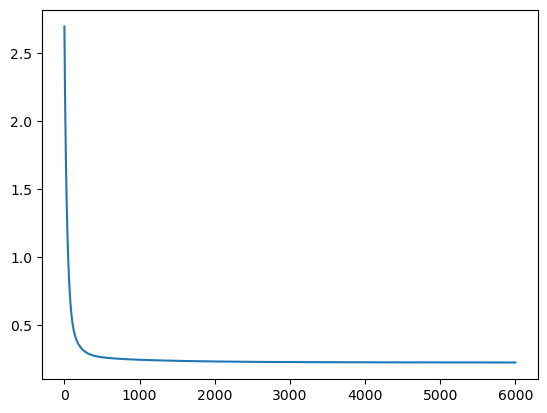

In [912]:
plt.plot(cost_history)

In [915]:
pred_test = model(X_test,theta)>=0.5

In [917]:
y_test.shape,pred_test.shape

((726, 1), (726, 1))

In [919]:
accuracy_score(pred_test, y_test)

0.9077134986225895

In [921]:
from sklearn.linear_model import LogisticRegression

In [923]:
model_sk = LogisticRegression()
model_sk.fit(x_train,y_train.reshape(-1))

LogisticRegression()

In [925]:
pred_test = model_sk.predict(x_test)

In [927]:
accuracy_score(y_test,pred_test)

0.9077134986225895

In [929]:
model_sk.score(x_test,y_test)

0.9077134986225895